In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Sigmoid function
# $$\frac{1}{1+e^{-z}}$$

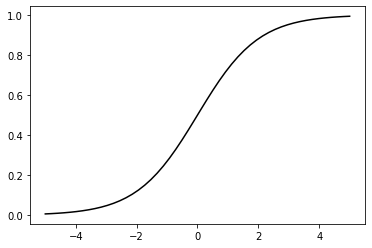

In [21]:
sigmoid = np.vectorize(lambda x: 1/(1 + np.exp(-x)))
x = np.linspace(-5, 5)
y = sigmoid(x)

plt.plot(x, y, 'k-')
plt.show()

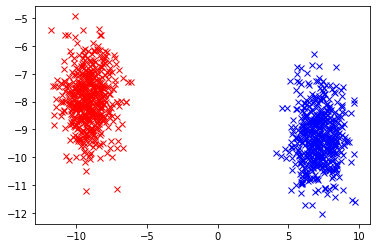

In [22]:
samples = 1000
features = 2

x, y = datasets.make_blobs(n_samples=samples, n_features=features, centers=2)
y = y.reshape(-1, 1)

plt.plot(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], 'bx')
plt.plot(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], 'rx')
plt.show()

In [23]:
aux = np.ones([samples, features + 1])
aux[:,1:] = x
x = aux 
x

array([[  1.        ,   5.29140147,  -9.64589284],
       [  1.        ,   8.03637004,  -9.41022473],
       [  1.        , -10.52680995,  -8.06255048],
       ...,
       [  1.        ,   5.60406041,  -6.99019565],
       [  1.        ,  -7.75340421,  -7.17696703],
       [  1.        ,   5.5706366 ,  -9.3079875 ]])

In [24]:
θ = np.random.rand(features + 1)
θ = θ.reshape(-1, 1)
θ

array([[0.28437198],
       [0.25561919],
       [0.59647478]])

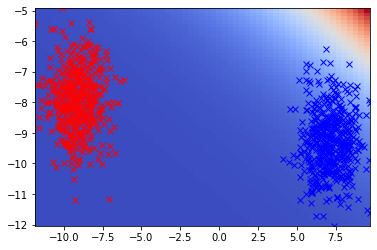

In [25]:
xx, yy = np.meshgrid(
    np.linspace(x[:,1].min(), x[:,1].max(), 60),
    np.linspace(x[:,2].min(), x[:,2].max(), 60),
)

# for each rrow in the mesh plane
prediction = np.zeros(xx.shape)
for i, (m_x, m_y) in enumerate(zip(xx, yy)):
    f = np.array([m_x, m_y]).T
    z = θ[1,:] + f @ θ[1:,:]
    prediction[i,:] = sigmoid(z).ravel()

plt.plot(x[y[:,0] == 0, 1], x[y[:,0] == 0, 2], 'bx')
plt.plot(x[y[:,0] == 1, 1], x[y[:,0] == 1, 2], 'rx')
plt.pcolormesh(xx, yy, prediction, cmap='coolwarm')
plt.show()

## Define gradient descent fucntion

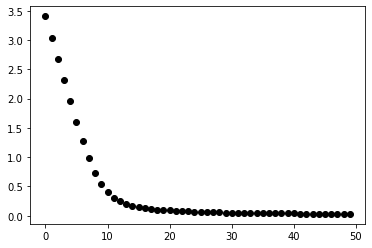

In [26]:
lr = 0.01
iterations = 50
for i in range(iterations):
    z = x @ θ
    prediction = sigmoid(z)

    error = 1/samples * np.sum(-y * np.log(prediction) - (1-y) * np.log(1-prediction))
    θ -= lr/samples * ((prediction - y).T @ x).T
    plt.plot(i, error, 'ok')

plt.show()

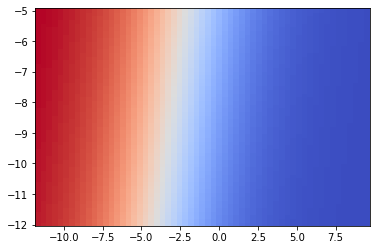

In [27]:
xx, yy = np.meshgrid(
    np.linspace(x[:,1].min(), x[:,1].max(), 60),
    np.linspace(x[:,2].min(), x[:,2].max(), 60),
)

# for each rrow in the mesh plane
prediction = np.zeros(xx.shape)
for i, (m_x, m_y) in enumerate(zip(xx, yy)):
    f = np.array([m_x, m_y]).T
    z = θ[1,:] + f @ θ[1:,:]
    prediction[i,:] = sigmoid(z).ravel()

plt.pcolormesh(xx, yy, prediction, cmap='coolwarm')
plt.show()

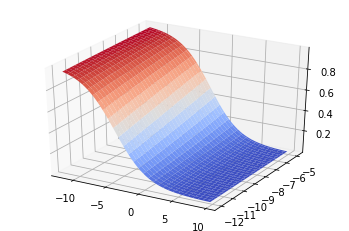

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xx, yy, prediction, cmap='coolwarm', linewidth=0, antialiased=True)